# 🧺 Online Retail Dataset (Apriori Preprocessing) - TASK 2
**Dataset**: https://www.kaggle.com/datasets/vijayuv/onlineretail



# Step 1: Load Data

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

data = pd.read_csv('OnlineRetail.csv',encoding='latin')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


# Step 2: Drop Missing Invoices or Descriptions

In [3]:
data.dropna(inplace=True,subset=['Description'])

In [4]:
data.isnull().sum()

InvoiceNo           0
StockCode           0
Description         0
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133626
Country             0
dtype: int64

# Step 3: Remove Canceled Invoices <BR> Start with letter 'c'

In [5]:
data = data[~ data['InvoiceNo'].str.lower().str.contains('c')]

In [21]:
data[data['InvoiceNo'].str.contains('c')].head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice


# Step 4: Keep Only Positive Quantities

In [7]:
data.drop(data[data['Quantity'] < 0].index,inplace=True)

In [8]:
data[data['Quantity']< 0].count()

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

# Step 5: Standardize Item Descriptions | Lower case and remove space

In [9]:
data['Description'] = data['Description'].str.lower().str.strip()

In [10]:
data

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,white hanging heart t-light holder,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,white metal lantern,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,cream cupid hearts coat hanger,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,knitted union flag hot water bottle,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,red woolly hottie white heart.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,pack of 20 spaceboy napkins,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,children's apron dolly girl,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,childrens cutlery dolly girl,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,childrens cutlery circus parade,4,12/9/2011 12:50,4.15,12680.0,France


# Step 6: Filter for a Single Country (e.g., United Kingdom)

In [11]:
data = data[data['Country'] == 'United Kingdom']

In [12]:
data.Country.value_counts()

Country
United Kingdom    485694
Name: count, dtype: int64

# Step 7: Remove Duplicates

In [13]:
data.drop_duplicates(inplace=True)

C:\Users\mannp\AppData\Local\Temp\ipykernel_20796\2282015914.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data.drop_duplicates(inplace=True)


In [14]:
data.duplicated().value_counts()

False    480551
Name: count, dtype: int64

# Step 8: Add TotalPrice column , TotalPrice = Quantity *  UnitPrice

In [15]:
data['TotalPrice'] = data['Quantity'] * data['UnitPrice']

C:\Users\mannp\AppData\Local\Temp\ipykernel_20796\1254887564.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['TotalPrice'] = data['Quantity'] * data['UnitPrice']


In [16]:
data['TotalPrice']

0          15.30
1          20.34
2          22.00
3          20.34
4          20.34
           ...  
541889     23.40
541890     23.60
541891     30.00
541892    214.80
541893     70.80
Name: TotalPrice, Length: 480551, dtype: float64

# Step 9 : Check for Top 10 Selling Products

In [17]:
data.sort_values(by='Quantity',ascending=True).head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
501885,578833,22107,pizza plate in box,1,11/25/2011 15:23,7.46,NaN,United Kingdom,7.46
501883,578833,22083,paper chain kit retrospot,1,11/25/2011 15:23,6.63,NaN,United Kingdom,6.63
501882,578833,22079,ribbon reel hearts design,1,11/25/2011 15:23,2.46,NaN,United Kingdom,2.46
501893,578833,22170,picture frame wood triple portrait,1,11/25/2011 15:23,13.29,NaN,United Kingdom,13.29
501892,578833,22166,wall mirror rectangle diamante pink,1,11/25/2011 15:23,15.79,NaN,United Kingdom,15.79
501875,578833,22024,rainy ladies birthday card,1,11/25/2011 15:23,0.83,NaN,United Kingdom,0.83
501873,578833,21945,strawberries design flannel,1,11/25/2011 15:23,1.63,NaN,United Kingdom,1.63
501872,578833,21944,kittens design flannel,1,11/25/2011 15:23,1.63,NaN,United Kingdom,1.63
501871,578833,21943,cakes and rabbits design flannel,1,11/25/2011 15:23,1.63,NaN,United Kingdom,1.63
501870,578833,21942,skulls design flannel,1,11/25/2011 15:23,1.63,NaN,United Kingdom,1.63


# Step 10 : Identify Most Active Customers

In [18]:
data.sort_values(by='CustomerID',ascending=True).head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,TotalPrice
61619,541431,23166,medium ceramic top storage jar,74215,1/18/2011 10:01,1.04,12346.0,United Kingdom,77183.60
64853,541677,71459,hanging jam jar t-light holder,12,1/20/2011 14:01,0.85,12747.0,United Kingdom,10.20
64850,541677,82484,wood black board ant white finish,36,1/20/2011 14:01,5.55,12747.0,United Kingdom,199.80
64849,541677,21136,painted metal pears assorted,16,1/20/2011 14:01,1.69,12747.0,United Kingdom,27.04
64852,541677,82482,wooden picture frame white finish,12,1/20/2011 14:01,2.55,12747.0,United Kingdom,30.60
9759,537215,82484,wood black board ant white finish,36,12/5/2010 15:38,5.55,12747.0,United Kingdom,199.80
9760,537215,21136,painted metal pears assorted,8,12/5/2010 15:38,1.69,12747.0,United Kingdom,13.52
64851,541677,82494L,wooden frame antique white,12,1/20/2011 14:01,2.95,12747.0,United Kingdom,35.40
9754,537215,85124C,green juicy fruit photo frame,12,12/5/2010 15:38,2.55,12747.0,United Kingdom,30.60
9755,537215,85124B,blue juicy fruit photo frame,6,12/5/2010 15:38,2.55,12747.0,United Kingdom,15.30


# Step 11: Time-Based Analysis | Convert InvoiceDate to datetime and check popular months/hours.

In [19]:
data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])
data['InvoiceDate'].value_counts()

C:\Users\mannp\AppData\Local\Temp\ipykernel_20796\2159608920.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['InvoiceDate'] = pd.to_datetime(data['InvoiceDate'])


InvoiceDate
2011-10-31 14:41:00    1114
2011-12-08 09:28:00     749
2011-12-09 10:03:00     731
2011-12-05 17:24:00     721
2011-06-29 15:58:00     705
                       ... 
2011-09-12 11:44:00       1
2011-09-12 12:13:00       1
2011-09-09 14:18:00       1
2011-09-09 15:10:00       1
2011-09-09 15:25:00       1
Name: count, Length: 16943, dtype: int64

<Axes: >

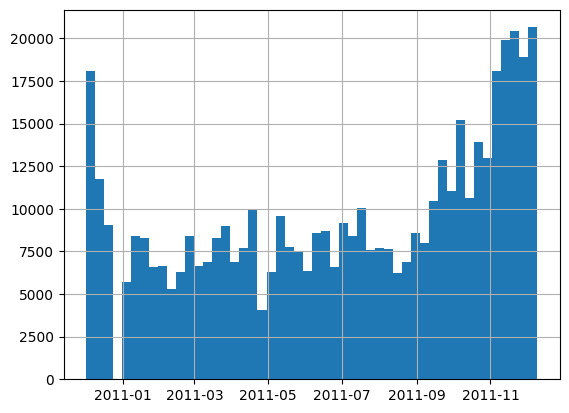

In [20]:
data['InvoiceDate'].hist(bins=50)

# Step 12: Convert to Basket Format 

Example
<table border="1">
    <thead>
        <tr>
            <th>Transaction</th>
            <th>Milk</th>
            <th>Bread</th>
            <th>Butter</th>
        </tr>
    </thead>
    <tbody>
        <tr><td>T1</td><td>1</td><td>1</td><td>1</td></tr>
        <tr><td>T2</td><td>0</td><td>1</td><td>1</td></tr>
        <tr><td>T3</td><td>1</td><td>0</td><td>0</td></tr>
        <tr><td>T4</td><td>1</td><td>1</td><td>0</td></tr>
        <tr><td>T5</td><td>0</td><td>1</td><td>1</td></tr>
    </tbody>
</table>


# Step:13 : Save Basket Format into CSV file